### 4주차 복습과제_DA_박보영

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine_data=pd.read_csv('wine_quality.csv')

In [3]:
wine_data.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
wine_data.drop(['index'], axis=1, inplace=True)

In [5]:
wine_data.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [6]:
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [7]:
wine_data.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<AxesSubplot:>

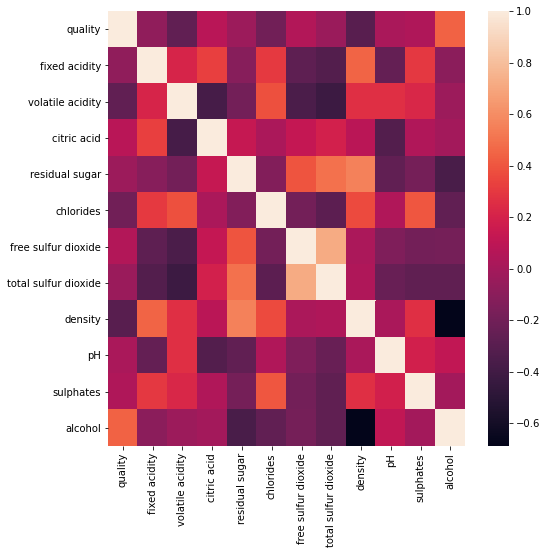

In [8]:
plt.figure(figsize=(8,8))
corr=wine_data.corr()
sns.heatmap(corr)

In [9]:
y_wine=wine_data['quality']
X_wine=wine_data.drop(['quality'],axis=1)


X_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [10]:
X_wine.loc[X_wine.type == "white", "type"] = 0

X_wine.loc[X_wine.type == "red", "type"] = 1

X_wine['type'] = X_wine.type.astype("category").cat.codes

In [11]:
X_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_wine)
X_wine_scaled=scaler.transform(X_wine)
X_wine_scaled=pd.DataFrame(data=X_wine_scaled, columns=X_wine.columns)

In [13]:
X_wine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,0.0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,1.0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,0.0
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,0.0
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,0.0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_wine_scaled, y_wine, test_size=0.2, random_state=123)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf=GradientBoostingClassifier(random_state=123)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
print(gb_accuracy)

0.5427272727272727


In [16]:
from sklearn.model_selection import GridSearchCV

params={ 'learning_rate':[0.05,0.1], 'n_estimators':[100,500] }

grid_cv=GridSearchCV(gb_clf, param_grid=params)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)

C:\Users\pby02\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'learning_rate': 0.1, 'n_estimators': 500}


In [17]:
pred=grid_cv.best_estimator_.predict(X_test)

print(accuracy_score(y_test,pred))

0.5645454545454546


In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
pred=xgb_wrapper.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred, average='macro'))

[16:08:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pby02\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5854545454545454
0.3402714324071237


In [19]:
from lightgbm import LGBMClassifier
params={ 'n_estimators' : [100,200,300,400,500], 'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2],'max_depth' : [3,4,5,6,7] }

lgbm_clf=LGBMClassifier(random_state=123)
grid_cv=GridSearchCV(lgbm_clf, param_grid=params)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)

estimator=grid_cv.best_estimator_
lgbm_clf.fit(X_train,y_train)
pred=lgbm_clf.predict(X_test)
print(accuracy_score(y_test,pred))


C:\Users\pby02\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400}
0.6381818181818182


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

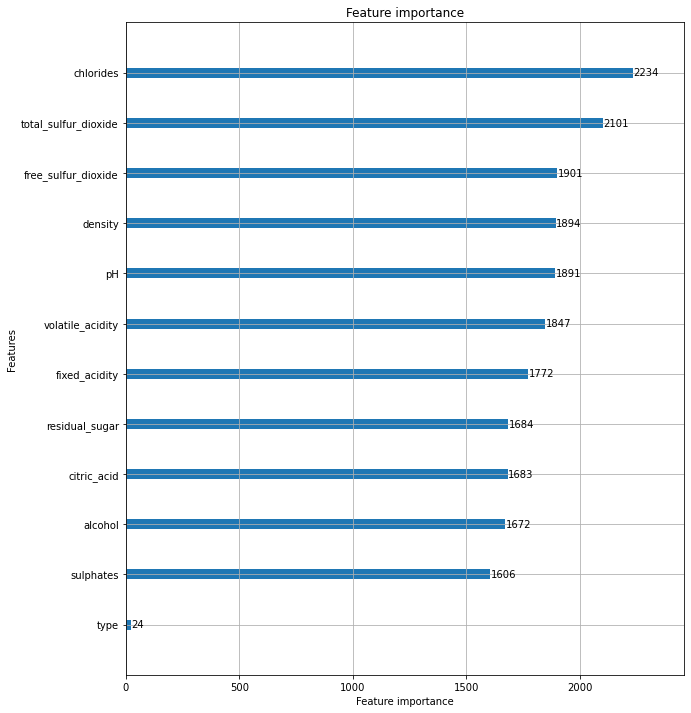

In [20]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf, ax=ax)

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf=KFold(n_splits=n_folds, shuffle=True, random_state=0)
    train_fold_pred=np.zeros((X_train_n.shape[0],1))
    test_pred=np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__)
    #X_train_n, X_test_n = X_train.loc[list(X_train.index)], X_test.loc[list(X_test.index)]
    for folder_counter,(train_index,valid_index) in enumerate(kf.split(X_train_n)):
        print(folder_counter)
        X_tr=X_train_n[train_index]
        y_tr=y_train_n[train_index]
        X_te=X_train_n[valid_index]
        
        model.fit(X_tr,y_tr)
        train_fold_pred[valid_index,:]=model.predict(X_te).reshape(-1,1)
        test_pred[:,folder_counter]=model.predict(X_test_n)
        
    test_pred_mean=np.mean(test_pred,axis=1).reshape(-1,1)
    return train_fold_pred , test_pred_mean

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [39]:
knn_clf=KNeighborsClassifier(n_neighbors=4)
rf_clf=RandomForestClassifier(n_estimators=100)
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)
lgbm_clf=LGBMClassifier(n_estimators=100)
lr_final=LogisticRegression(C=10)


In [40]:
knn_train,knn_test=get_stacking_base_datasets(knn_clf,X_train,y_train,X_test,7)
rf_train,rf_test=get_stacking_base_datasets(rf_clf,X_train,y_train,X_test,7)
dt_train,dt_test=get_stacking_base_datasets(dt_clf,X_train,y_train,X_test,7)
ada_train,ada_test=get_stacking_base_datasets(ada_clf,X_train,y_train,X_test,7)
lgbm_train,lgbm_test=get_stacking_base_datasets(lgbm_clf,X_train,y_train,X_test,7)


KNeighborsClassifier
0


KeyError: "None of [Int64Index([   0,    2,    3,    4,    5,    6,    7,    8,    9,   10,\n            ...\n            4384, 4385, 4387, 4389, 4391, 4392, 4393, 4394, 4395, 4396],\n           dtype='int64', length=3768)] are in the [columns]"

In [ ]:
Stack_final_X_train=np.concatenate((knn_train,rf_train,dt_train,ada_train, lgbm_train),axis=1)
Stack_final_X_test=np.concatenate((knn_test,rf_test,dt_test,ada_test, lgbm_test),axis=1)

In [ ]:
lr_final.fit(Stack_final_X_train,y_train)
stack_final=lr_final.predict(Stack_final_X_test)
print(accuracy_score(y_test,stack_final))

### 버섯

In [41]:
!pip install catboost

In [42]:
import pandas as pd
import numpy as np

In [43]:
mush_data=pd.read_csv('mushrooms.csv')


In [44]:
mush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [45]:
from sklearn.preprocessing import LabelEncoder

for col in mush_data.columns:
    
    le = LabelEncoder()
    le=le.fit(mush_data[col])
    mush_data[col]= le.transform(mush_data[col])


In [46]:
y_mushroom=mush_data['class']
X_mushroom=mush_data.drop(['class'],axis=1)

In [47]:
y_mushroom.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [48]:
X_mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_mushroom,y_mushroom, test_size=0.2, random_state=123)

In [50]:
##잘 분리됐는지 확인

In [51]:
y_train.value_counts()


0    3345
1    3154
Name: class, dtype: int64

In [52]:
y_test.value_counts()

0    863
1    762
Name: class, dtype: int64

In [53]:
from catboost import Pool

In [54]:
train_pool=Pool(data=X_train, label=y_train)
test_pool=Pool(data=X_test, label=y_test)

In [55]:
from catboost import CatBoostClassifier

catb=CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
catb.fit(train_pool)
catb_preds=catb.predict(test_pool)
catb_pred_proba=catb.predict_proba(test_pool)[:,1]

0:	learn: 0.5280376	total: 164ms	remaining: 1m 5s
1:	learn: 0.4428227	total: 166ms	remaining: 33.1s
2:	learn: 0.3535636	total: 168ms	remaining: 22.3s
3:	learn: 0.2498993	total: 171ms	remaining: 16.9s
4:	learn: 0.2045613	total: 173ms	remaining: 13.7s
5:	learn: 0.1567487	total: 176ms	remaining: 11.5s
6:	learn: 0.1416595	total: 178ms	remaining: 10s
7:	learn: 0.1232312	total: 180ms	remaining: 8.83s
8:	learn: 0.1028037	total: 182ms	remaining: 7.92s
9:	learn: 0.0918272	total: 184ms	remaining: 7.19s
10:	learn: 0.0808288	total: 187ms	remaining: 6.6s
11:	learn: 0.0739463	total: 189ms	remaining: 6.1s
12:	learn: 0.0689031	total: 191ms	remaining: 5.68s
13:	learn: 0.0634026	total: 193ms	remaining: 5.32s
14:	learn: 0.0584932	total: 195ms	remaining: 5.01s
15:	learn: 0.0565235	total: 198ms	remaining: 4.74s
16:	learn: 0.0533099	total: 200ms	remaining: 4.5s
17:	learn: 0.0520471	total: 202ms	remaining: 4.29s
18:	learn: 0.0510058	total: 205ms	remaining: 4.1s
19:	learn: 0.0498519	total: 207ms	remaining: 3.

237:	learn: 0.0013160	total: 685ms	remaining: 466ms
238:	learn: 0.0013160	total: 687ms	remaining: 463ms
239:	learn: 0.0013160	total: 688ms	remaining: 459ms
240:	learn: 0.0013160	total: 690ms	remaining: 455ms
241:	learn: 0.0013160	total: 692ms	remaining: 452ms
242:	learn: 0.0013160	total: 694ms	remaining: 448ms
243:	learn: 0.0013160	total: 695ms	remaining: 445ms
244:	learn: 0.0013160	total: 697ms	remaining: 441ms
245:	learn: 0.0013160	total: 699ms	remaining: 438ms
246:	learn: 0.0013160	total: 702ms	remaining: 435ms
247:	learn: 0.0013160	total: 704ms	remaining: 432ms
248:	learn: 0.0013160	total: 706ms	remaining: 428ms
249:	learn: 0.0013160	total: 709ms	remaining: 425ms
250:	learn: 0.0013160	total: 712ms	remaining: 422ms
251:	learn: 0.0013160	total: 714ms	remaining: 419ms
252:	learn: 0.0013160	total: 715ms	remaining: 416ms
253:	learn: 0.0013160	total: 717ms	remaining: 412ms
254:	learn: 0.0013160	total: 719ms	remaining: 409ms
255:	learn: 0.0013160	total: 720ms	remaining: 405ms
256:	learn: 

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision, recall,f1,roc_auc))

In [57]:
get_clf_eval(y_test, catb_preds, catb_pred_proba)

오차행렬
[[863   0]
 [  0 762]]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, F1:1.0000, AUC:1.0000
